<a href="https://colab.research.google.com/github/BEAMMII-19/Project_SE_Salary-Prediction/blob/main/Salary_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

path = '/content/drive/MyDrive/DataforProject/salary.csv'
data = pd.read_csv(path)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [5]:
data.nunique() #Checking Unique values

,0
age,73
workclass,9
fnlwgt,21648
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [6]:
data.isnull().sum() #Check null values

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
print(data['salary'].unique())

[' <=50K' ' >50K']


In [ ]:
data['salary']

,salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


# กรองเอาเฉพาะ SE ASIAN

In [8]:
se_asia_countries = [' Thailand', ' Vietnam', ' Laos', ' Philippines',' Cambodia']
data_se_asia = data[data['native-country'].isin(se_asia_countries)]

In [9]:
list(data_se_asia.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'salary']

In [10]:
print(data_se_asia['native-country'].unique())

[' Philippines' ' Cambodia' ' Thailand' ' Laos' ' Vietnam']


In [11]:
#data_se_asia = data[data['native-country'].isin(se_asia_countries)]

In [12]:
# 1️⃣ แปลงตัวแปร binary

data_se_asia.loc[:, 'sex'] = data_se_asia['sex'].astype(str).str.strip().str.title()
data_se_asia.loc[:, 'sex'] = data_se_asia['sex'].map({'Male':1, 'Female':0})

data_se_asia.loc[:, 'salary'] = data_se_asia['salary'].astype(str).str.strip().str.title()
data_se_asia.loc[:, 'salary'] = data_se_asia['salary'].map({'>50K':1, '<=50K':0})


Label
Salary : >50K':1, '<=50K':0

In [13]:
data_se_asia['salary']

,salary
152,0
255,1
265,1
304,0
434,0
...,...
32129,1
32199,1
32203,1
32370,1


In [14]:
data_se_asia['sex']

,sex
152,0
255,1
265,1
304,0
434,1
...,...
32129,1
32199,1
32203,1
32370,1


In [15]:
data_se_asia

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
152,33,Private,163003,Bachelors,13,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,0,0,0,40,Philippines,0
255,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,1,0,0,40,Cambodia,1
265,37,Self-emp-inc,257295,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,1,0,0,75,Thailand,1
304,24,Private,303296,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,0,0,0,40,Laos,0
434,27,Private,116358,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,1,0,1980,40,Philippines,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,48,Private,350440,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,1,0,0,40,Cambodia,1
32199,27,Private,100669,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,1,0,0,40,Philippines,1
32203,51,Federal-gov,223206,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,1,15024,0,40,Vietnam,1
32370,53,Self-emp-not-inc,137547,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,1,27828,0,40,Philippines,1


In [16]:
print(data_se_asia[data_se_asia['sex'].isna()])
print(data_se_asia[data_se_asia['salary'].isna()])
# Map checking


Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary]
Index: []
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary]
Index: []


In [17]:
data_se_asia.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32129,48,Private,350440,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,1,0,0,40,Cambodia,1
32199,27,Private,100669,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,1,0,0,40,Philippines,1
32203,51,Federal-gov,223206,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,1,15024,0,40,Vietnam,1
32370,53,Self-emp-not-inc,137547,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,1,27828,0,40,Philippines,1
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,0,0,0,40,Philippines,0


# ทำ PCA เพื่อลดมิติข้อมูล
preprocess คือ (categorical -> 0/1, continuous -> scaled)

เอเชียตะวันออกเฉียงใต้ (Southeast Asia)




In [18]:
# กำหนดรายชื่อประเทศ SE Asia
#se_asia_countries = [' Thailand', ' Vietnam', ' Laos', ' Philippines',' Cambodia']

# กรอง DataFrame
#data_se_asia = data[data['native-country'].isin(se_asia_countries)]

# ตรวจสอบผล
#print(data_se_asia['native-country'].unique())
#print(data_se_asia.head())
# Already done previously

In [19]:
# @title
# กำหนดรายชื่อประเทศ SE Asia
Laos = [' Laos']

# กรอง DataFrame
Laos = data[data['native-country'].isin(Laos)]

# ตรวจสอบผล
print(Laos['native-country'].unique())
print(Laos.head())

[' Laos']
       age workclass  fnlwgt      education  education-num  \
304     24   Private  303296   Some-college             10   
4610    30   Private  350979        HS-grad              9   
5971    53   Private   97411        5th-6th              3   
6853    36   Private  228157   Some-college             10   
15310   19         ?  109938           11th              7   

            marital-status          occupation    relationship  \
304     Married-civ-spouse        Adm-clerical            Wife   
4610    Married-civ-spouse        Craft-repair         Husband   
5971    Married-civ-spouse   Machine-op-inspct         Husband   
6853         Never-married        Craft-repair   Not-in-family   
15310   Married-civ-spouse                   ?            Wife   

                      race      sex  capital-gain  capital-loss  \
304     Asian-Pac-Islander   Female             0             0   
4610    Asian-Pac-Islander     Male             0             0   
5971    Asian-Pac-I

In [20]:
data_se_asia.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [21]:
print(data_se_asia['native-country'].value_counts())

native-country
Philippines    198
Vietnam         67
Cambodia        19
Thailand        18
Laos            18
Name: count, dtype: int64


## Dummy

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

categorical_cols = ['workclass','education','marital-status','occupation',
                    'relationship','race','sex','native-country']

continuous_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
data_encoded = pd.get_dummies(data_se_asia, columns=categorical_cols, drop_first= False)


## Standardized

In [23]:
scaler = StandardScaler()
data_encoded[continuous_cols] = scaler.fit_transform(data_encoded[continuous_cols])
#X_scaled = scaler.fit_transform(data_encoded[continuous_cols])


In [24]:
print(data_encoded.head())
print(data_encoded.shape)  # จะเห็นจำนวน column หลัง one-hot encoding , 1 colunm : 1 Dummy category ,That's why we obtain too many column.


          age    fnlwgt  education-num  capital-gain  capital-loss  \
152 -0.363856 -0.085578       0.867024     -0.137746     -0.220111   
255  0.332890  1.477612      -0.449454     -0.137746     -0.220111   
265 -0.054191  0.966945      -0.120334     -0.137746     -0.220111   
304 -1.060602  1.480425      -0.120334     -0.137746     -0.220111   
434 -0.828354 -0.606247      -0.120334     -0.137746      4.602234   

     hours-per-week salary  workclass_ ?  workclass_ Federal-gov  \
152        0.038178      0         False                   False   
255        0.038178      1         False                   False   
265        3.159310      1         False                   False   
304        0.038178      0         False                   False   
434        0.038178      0         False                   False   

     workclass_ Local-gov  ...  race_ Asian-Pac-Islander  race_ Black  \
152                 False  ...                      True        False   
255                 Fals

In [25]:
print(data_encoded.columns.tolist())


['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handle

In [26]:
print(data_encoded.head())
print(data_encoded.shape)
print(data_encoded.dtypes)


          age    fnlwgt  education-num  capital-gain  capital-loss  \
152 -0.363856 -0.085578       0.867024     -0.137746     -0.220111   
255  0.332890  1.477612      -0.449454     -0.137746     -0.220111   
265 -0.054191  0.966945      -0.120334     -0.137746     -0.220111   
304 -1.060602  1.480425      -0.120334     -0.137746     -0.220111   
434 -0.828354 -0.606247      -0.120334     -0.137746      4.602234   

     hours-per-week salary  workclass_ ?  workclass_ Federal-gov  \
152        0.038178      0         False                   False   
255        0.038178      1         False                   False   
265        3.159310      1         False                   False   
304        0.038178      0         False                   False   
434        0.038178      0         False                   False   

     workclass_ Local-gov  ...  race_ Asian-Pac-Islander  race_ Black  \
152                 False  ...                      True        False   
255                 Fals

In [27]:
data_encoded.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,race_ Asian-Pac-Islander,race_ Black,race_ White,sex_0,sex_1,native-country_ Cambodia,native-country_ Laos,native-country_ Philippines,native-country_ Thailand,native-country_ Vietnam
152,-0.363856,-0.085578,0.867024,-0.137746,-0.220111,0.038178,0,False,False,False,...,True,False,False,True,False,False,False,True,False,False
255,0.332890,1.477612,-0.449454,-0.137746,-0.220111,0.038178,1,False,False,False,...,True,False,False,False,True,True,False,False,False,False
265,-0.054191,0.966945,-0.120334,-0.137746,-0.220111,3.159310,1,False,False,False,...,True,False,False,False,True,False,False,False,True,False
304,-1.060602,1.480425,-0.120334,-0.137746,-0.220111,0.038178,0,False,False,False,...,True,False,False,True,False,False,True,False,False,False
434,-0.828354,-0.606247,-0.120334,-0.137746,4.602234,0.038178,0,False,False,False,...,True,False,False,False,True,False,False,True,False,False


# PCA

In [28]:
X = data_encoded.drop('salary', axis=1)   # แยกเอาแค่ตัวแปรอิสระ by Deleting the class
y = data_encoded['salary']                # ตัวแปรที่ต้องการทำนาย (optional)


## #data_encoded is a dataframe only have their attributes.


In [30]:
from sklearn.decomposition import PCA

# กำหนดจำนวน components ที่ต้องการ เช่น 0.95 เพื่อเก็บข้อมูล 95% ของความแปรปรวน
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)



In [31]:
X_pca.shape

(320, 29)

In [32]:
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues)

Eigenvalues: [1.62013777 1.20858773 1.05702803 0.98457843 0.92435951 0.86129373
 0.54495515 0.34258145 0.31986268 0.24691898 0.20254535 0.18615328
 0.16811108 0.15522842 0.1382869  0.12622559 0.11891734 0.10485244
 0.09983214 0.094102   0.08512256 0.08261749 0.07431117 0.07054723
 0.0661525  0.06181043 0.05815699 0.05340018 0.04796151]


In [34]:
explained_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_ratio)
print("Total explained variance:", sum(explained_ratio))
# เลือก 95%

Explained variance ratio: [0.15235488 0.11365345 0.09940104 0.09258801 0.08692513 0.08099454
 0.05124662 0.03221575 0.03007932 0.02321982 0.01904701 0.01750552
 0.01580887 0.01459741 0.01300425 0.01187003 0.01118278 0.00986014
 0.00938804 0.00884919 0.00800477 0.0077692  0.00698809 0.00663414
 0.00622086 0.00581254 0.00546898 0.00502166 0.00451022]
Total explained variance: 0.9502222468056549


In [35]:
n_components = pca.n_components_
print("Number of components selected:", n_components)


Number of components selected: 29


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Checking

In [67]:
X = data_encoded.values  # แปลง DataFrame เป็น numpy array
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)


In [68]:
# Eigenvalues ของแต่ละ Principal Component
print("Eigenvalues:")
print(pca.explained_variance_)

# Eigenvectors หรือ Loading Matrix
print("\nEigenvectors (principal axes in feature space):")
print(pca.components_)

# สัดส่วนความแปรปรวนที่แต่ละ PC อธิบายได้
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

# สัดส่วนความแปรปรวนสะสม
import numpy as np
print("\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))


Eigenvalues:
[1.66571438 1.20868416 1.05770021 0.98458484 0.92469482 0.861465
 0.556472   0.36186957 0.32025188 0.24703251 0.20324037 0.18770142
 0.17152056 0.15582155 0.14948877 0.12935217 0.11901779 0.11271541
 0.09983457 0.09807293 0.08870376 0.08292795 0.07906535 0.073721
 0.06983557 0.06266954 0.06092614 0.05810497 0.05299253 0.04725662]

Eigenvectors (principal axes in feature space):
[[ 0.4841691   0.19407143  0.4466222  ...  0.08873323 -0.00133287
  -0.0708429 ]
 [ 0.51275718 -0.47714957 -0.50721643 ...  0.0057548  -0.01194454
  -0.00917154]
 [ 0.25959859  0.2910465  -0.25883087 ... -0.0257821  -0.01575147
   0.00654982]
 ...
 [ 0.00992791 -0.02133853 -0.00696987 ...  0.00268066 -0.0104014
  -0.02327064]
 [-0.00902609 -0.00881583  0.04198914 ... -0.08337426 -0.29422903
  -0.02134545]
 [-0.00146786  0.01516033 -0.03755934 ...  0.02139881 -0.22987138
   0.02130386]]

Explained variance ratio:
[0.15396356 0.11171982 0.09776423 0.09100611 0.08547042 0.07962603
 0.05143523 0.0334479

In [69]:
# สมมติว่า y คือ label ของคุณ

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)


In [70]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)



*หมายความว่า* train_test_split ทำงานถูกต้องแล้ว

สัดส่วน train:test ≈ 224:96 → ประมาณ 70% train / 30% test ตามที่ตั้งค่า test_size=0.3

In [71]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (224, 30)
X_test shape: (96, 30)
y_train shape: (224,)
y_test shape: (96,)


In [72]:
print(y_train[:10])
print(y_train.dtype)
print(y_train.nunique())  # ถ้าเป็น pandas Series


4919     0
22618    0
15403    0
19501    1
32129    1
11354    0
27714    0
7909     0
20825    0
2590     0
Name: salary, dtype: int64
int64
2


In [73]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [75]:
print(y_train.dtype)


int64


In [76]:
model = LogisticRegression(max_iter=1000)  # max_iter เพิ่มเผื่อ converge ช้า
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [77]:
y_proba = model.predict_proba(X_test)
y_proba

array([[0.97469089, 0.02530911],
       [0.97955533, 0.02044467],
       [0.02454264, 0.97545736],
       [0.98144835, 0.01855165],
       [0.99175753, 0.00824247],
       [0.159526  , 0.840474  ],
       [0.99657919, 0.00342081],
       [0.9949743 , 0.0050257 ],
       [0.1628657 , 0.8371343 ],
       [0.90569943, 0.09430057],
       [0.99393001, 0.00606999],
       [0.09620987, 0.90379013],
       [0.9381294 , 0.0618706 ],
       [0.98670458, 0.01329542],
       [0.99188904, 0.00811096],
       [0.0815725 , 0.9184275 ],
       [0.98827212, 0.01172788],
       [0.99288007, 0.00711993],
       [0.99000435, 0.00999565],
       [0.98831909, 0.01168091],
       [0.95062385, 0.04937615],
       [0.02656617, 0.97343383],
       [0.97737777, 0.02262223],
       [0.25169662, 0.74830338],
       [0.97583667, 0.02416333],
       [0.04169471, 0.95830529],
       [0.09559768, 0.90440232],
       [0.90246493, 0.09753507],
       [0.97178165, 0.02821835],
       [0.99083261, 0.00916739],
       [0.

In [78]:
y_pred = model.predict(X_test)



P(Y=1)>0.5 โมเดลจะทำนายว่า เงินเดือน >50K

P(Y=1)≤0.5 โมเดลจะทำนายว่า เงินเดือน <=50K

In [79]:
print(y_pred)

[0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]


In [80]:
len(y_pred)

96

# Evaluation Model < Confusion Matrix >

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[69  0]
 [ 0 27]]


In [56]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Data imbalance ทำให้ค่า class1 ถูกตรวจจับได้น้อย


In [57]:
from sklearn.metrics import classification_report

# แสดง precision, recall, f1-score ของแต่ละ class
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        27

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



# ทำนายถูกจนน่าสงสัย ตรวจสอบ

In [82]:
# ดูว่า PC แต่ละตัวอธิบายข้อมูลไปกี่ %
print(pca.explained_variance_ratio_)
# ดูผลรวมสะสม

print(np.cumsum(pca.explained_variance_ratio_))

[0.15396356 0.11171982 0.09776423 0.09100611 0.08547042 0.07962603
 0.05143523 0.03344795 0.02960119 0.02283345 0.0187857  0.01734942
 0.01585381 0.01440273 0.01381739 0.01195614 0.01100093 0.01041839
 0.0092278  0.00906497 0.00819897 0.00766511 0.00730809 0.0068141
 0.00645497 0.00579261 0.00563146 0.0053707  0.00489815 0.00436797]
[0.15396356 0.26568338 0.36344762 0.45445373 0.53992415 0.61955017
 0.67098541 0.70443336 0.73403454 0.75686799 0.77565369 0.79300311
 0.80885692 0.82325965 0.83707704 0.84903319 0.86003411 0.87045251
 0.87968031 0.88874528 0.89694426 0.90460936 0.91191745 0.91873155
 0.92518652 0.93097912 0.93661059 0.94198128 0.94687943 0.95124741]


In [58]:
data_encoded['salary']

,salary
152,0
255,1
265,1
304,0
434,0
...,...
32129,1
32199,1
32203,1
32370,1


แปลง  y_train -> int

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [60]:
print("Coefficients:", model.coef_) #สัมประสิทธิ๋
print("Intercept:", model.intercept_) #constanct


Coefficients: [[ 1.66097054 -0.0116672  -0.34320619  0.16241764 -0.35995985  0.02590665
  -1.28059428  2.00118689 -0.28770588  0.2222891   0.58531052  0.76252985
   1.4898096  -0.71803209 -1.87827995  0.70342694 -0.25308076 -1.2130825
  -0.02013601 -1.09021163  1.13707593  0.3051088   1.11070631  0.49341706
  -0.18282366 -0.82224909  0.8264141  -0.15433411  0.22637137  0.3809396 ]]
Intercept: [-2.48546279]




---

---





# ลองใช้แค่ 6 Component ตาม Scree plot

# ทำนายคลาสเงินเดือนในพื้นที่เอเชียตะวันออกเฉียงใต้ จากปัจจัยต่างๆ ที่ผ่านการทำ PCA เพื่อลด dimention ของข้อมูล และเลือกมา 6 components

## เลือกจำนวน Component จาก Scree Plot (6 component)

In [90]:
import matplotlib.pyplot as plt


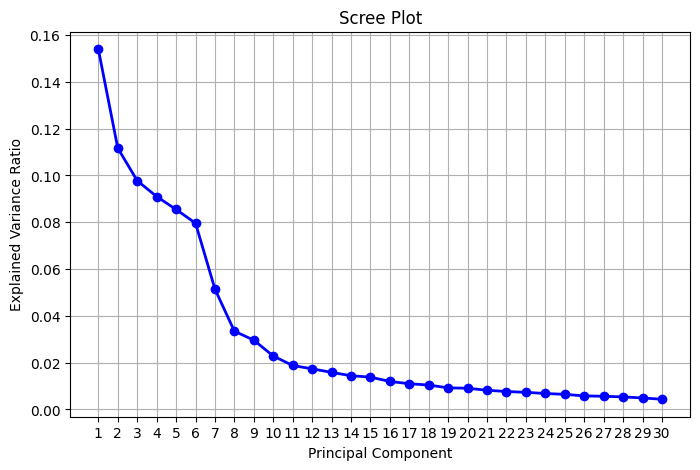

In [91]:

from sklearn.decomposition import PCA

# สมมติว่า pca คือ PCA object ที่ fit แล้ว
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance)+1))
plt.grid(True)
plt.show()


In [105]:
# 1. เลือกมาแค่ 6 คอลัมน์แรก (Index 0 ถึง 5)
X_pca_6 = X_pca[:, :6]

# 2. แบ่งข้อมูล
X_train_6, X_test_6, y_train, y_test = train_test_split(
    X_pca_6, y, test_size=0.3, random_state=42, stratify=y
)

# 3. สร้างและเทรนโมเดลใหม่
model_6 = LogisticRegression()
model_6.fit(X_train_6, y_train)

# 4. ทำนายและดูผล
y_pred_6 = model_6.predict(X_test_6)

In [104]:
y_pred_6.shape

(96,)

In [103]:
y_pred_6

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [109]:
cm6cp = confusion_matrix(y_test, y_pred_6)
cm6cp

array([[66,  7],
       [12, 11]])

## Compare the actual class and predicted class.

In [ ]:
import pandas as pd

# สร้าง DataFrame เปรียบเทียบ
df_compare = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred6
})

print(df_compare.head(10))  # ดู 10 ตัวอย่างแรก


       Actual  Predicted
17877       0          0
23607       0          0
4055        1          1
7697        0          0
1609        0          0
11483       1          0
19561       0          0
15124       0          0
25636       1          0
22876       0          1


โมเดลสามารถทำนาย class 0 (<=50K) ได้แม่นกว่า

โมเดล ไม่ค่อยแม่นในการจับคนที่มี class 1 (>50K)

การใช้ 6 PCA components ทำให้ accuracy ยังโอเค (0.78) แต่ recall สำหรับ class 1 ต่ำกว่าเมื่อใช้ 29 components

## Class 0 likly have any score more than class 1 because Data is imblance, class 0 larger than the other.

# Resolving : ใช้ metrics ที่ไม่ biased กับ class imbalance

### เช่น ROC-AUC, balanced accuracy, F1-score ของ class 1

# Data Analysis

# Southeast Asia income Analysis

Mostly southeast asia people has a salary under 50K

In [114]:
data_se_asia

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
152,33,Private,163003,Bachelors,13,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,0,0,0,40,Philippines,0
255,42,Self-emp-not-inc,303044,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,1,0,0,40,Cambodia,1
265,37,Self-emp-inc,257295,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,1,0,0,75,Thailand,1
304,24,Private,303296,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,0,0,0,40,Laos,0
434,27,Private,116358,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,1,0,1980,40,Philippines,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,48,Private,350440,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,1,0,0,40,Cambodia,1
32199,27,Private,100669,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,1,0,0,40,Philippines,1
32203,51,Federal-gov,223206,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,1,15024,0,40,Vietnam,1
32370,53,Self-emp-not-inc,137547,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,1,27828,0,40,Philippines,1


In [116]:
numeric_cols = data_se_asia.select_dtypes(include=['number'])

In [117]:
numeric_cols

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
152,33,163003,13,0,0,40
255,42,303044,9,0,0,40
265,37,257295,10,0,0,75
304,24,303296,10,0,0,40
434,27,116358,10,0,1980,40
...,...,...,...,...,...,...
32129,48,350440,10,0,0,40
32199,27,100669,10,0,0,40
32203,51,223206,16,15024,0,40
32370,53,137547,15,27828,0,40


## Class
 > more than 50K : 1

 > less than or equal 50K : 0

salary
0    36.404959
1    41.717949
Name: age, dtype: float64


<Axes: xlabel='salary', ylabel='hours-per-week'>

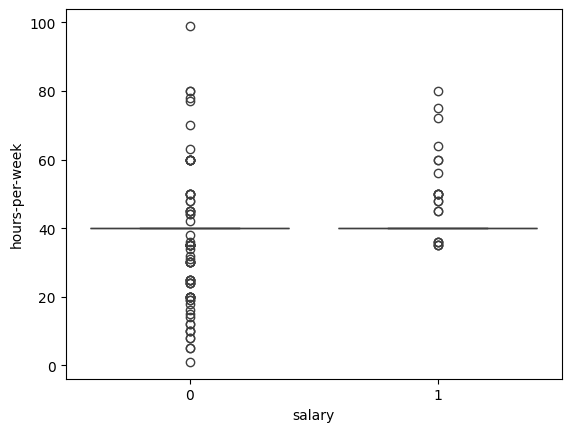

In [120]:
# เปรียบเทียบอายุเฉลี่ยของคนสองกลุ่ม
print(data_se_asia.groupby('salary')['age'].mean())

# พลอตกราฟโดยใช้ salary เป็นตัวแบ่งสี (hue)
import seaborn as sns
sns.boxplot(x='salary', y='hours-per-week', data=data_se_asia)

##  Conclusion :
### The boxplot reveals distinct distribution patterns: the low-income group (<=50K) exhibits high variance with work hours spanning widely both above and below the median. In contrast, the high-income group (>50K) shows a distribution that is skewed towards higher values, tightly clustering above the median threshold, indicating a strong correlation between overtime work and higher salary tiers."

### Since the both median line are closed we considerate an average of work time instead.

In [121]:
print(data_se_asia.groupby('salary')['hours-per-week'].mean())

salary
0    38.458678
1    43.025641
Name: hours-per-week, dtype: float64


# Conclusion :
class 0 ( Salary <= 50K ) an average of work hour for a week is 38.459 hours.

class 1 ( Salary >50K ) an average of work hour for a week is 40.025 hours.
### Quantitative analysis reveals a correlation between work intensity and income; the high-income segment averages 43 hours/week, exceeding the standard full-time threshold, whereas the lower-income segment averages 38 hours/week, reflecting a higher prevalence of part-time or hourly engagements.